In [1]:
import sys
sys.path.append("..")
from common.download_utils import download_week1_resources

download_week1_resources()

HBox(children=(IntProgress(value=0, max=7196138), HTML(value='')))

HBox(children=(IntProgress(value=0, max=2166270), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1041379), HTML(value='')))

HBox(children=(IntProgress(value=0, max=5091), HTML(value='')))

In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
from ast import literal_eval
import pandas as pd
import numpy as np

In [8]:
def read_data(filename):
    data = pd.read_csv(filename, sep='\t')
    data['tags'] = data['tags'].apply(literal_eval)
    return data

In [9]:
train = read_data('data/train.tsv')
validation = read_data('data/validation.tsv')
test = pd.read_csv('data/test.tsv', sep='\t')

In [10]:
train.head()

,title,tags
0,How to draw a stacked dotplot in R?,[r]
1,mysql select all records where a datetime fiel...,"[php, mysql]"
2,How to terminate windows phone 8.1 app,[c#]
3,get current time in a specific country via jquery,"[javascript, jquery]"
4,Configuring Tomcat to Use SSL,[java]


In [11]:
X_train, y_train = train['title'].values, train['tags'].values
X_val, y_val = validation['title'].values, validation['tags'].values
X_test = test['title'].values

In [12]:
import re

In [41]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def text_prepare(text):
    
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub("",text)# replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub("",text)# delete symbols which are in BAD_SYMBOLS_RE from text
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    text = pattern.sub('', text) # delete stopwords from text
    text = ' '.join(text.split())
    return text

In [44]:
def test_text_prepare():
    examples = ["SQL Server - any equivalent of Excel's CHOOSE function?",
                "How to free c++ memory vector<int> * arr?"]
    answers = ["sql server equivalent excels choose function", 
               "free c++ memory vectorint arr"]
    for ex, ans in zip(examples, answers):
        if text_prepare(ex) != ans:
            return "Wrong answer for the case: '%s'" % ex
    return 'Basic tests are passed.'

In [45]:
print(test_text_prepare())

Basic tests are passed.


In [46]:
sys.path.insert(0, './week1')

In [47]:
from grader import Grader

In [48]:
grader = Grader()

In [50]:
prepared_questions = []
for line in open('data/text_prepare_tests.tsv', encoding='utf-8'):
    line = text_prepare(line.strip())
    prepared_questions.append(line)
text_prepare_results = '\n'.join(prepared_questions)

text_prepare_results

'sqlitephp readonly\ncreating multiple textboxes dynamically\nself one prefer javascript\nsave php date string mysql database timestamp\nfill dropdownlist data xml file aspnet application\nprogrammatically trigger jqueryui draggables drag event\nget value method argument via reflection java\nknockout mapingfromjs observablearray json object data gets lost\nfacebook connect localhost weird stuff\nfullcalendar prev next click\nsyntaxerror unexpected token\neffective way float double comparison\ngem install rails fails dns error\nlistshuttle component richfaces getting updated\nlaravel responsedownload show images laravel\nwrong rspec test\ncalendar display using java swing\npython selenium import regular firefox profile addons\nrandom number 2 variablesvalues\naltering http responses firefox extension\nstart session python web application\nalign radio buttons horizontally django forms\ncount number rows sqlite database\nwordpress wp_rewrite rules\nremoving sheet excel 2005 using php\nphp

In [51]:
grader.submit_tag('TextPrepare', text_prepare_results)

Current answer for task TextPrepare is:
 sqlitephp readonly
creating multiple textboxes dynamically
self one prefer javascript
save php date ...


In [52]:
X_train = [text_prepare(x) for x in X_train]
X_val = [text_prepare(x) for x in X_val]
X_test = [text_prepare(x) for x in X_test]

In [53]:
X_train[:3]

['draw stacked dotplot r',
 'mysql select records datetime field less specified value',
 'terminate windows phone 81 app']

In [73]:
# Dictionary of all tags from train corpus with their counts.
tags_counts = {}
# Dictionary of all words from train corpus with their counts.
words_counts = {}
for each_list in y_train:
    for each_tag in each_list:
        if (each_tag in tags_counts): 
            tags_counts[each_tag] += 1
        else: 
            tags_counts[each_tag] = 1

for each_sentence in X_train:
    for each_word in each_sentence.split():
        if(each_word in words_counts):
            words_counts[each_word] +=1
        else:
            words_counts[each_word] =1

In [74]:
words_counts

{'uncommon': 1,
 'dllso': 1,
 'coredata': 21,
 'get_user': 1,
 'htmltablecellelement': 1,
 'taskset': 1,
 'refreshing': 59,
 'requesting': 9,
 'structural': 1,
 'archeticture': 1,
 'people': 22,
 'varying255': 1,
 'repeat': 34,
 'functionsequations': 1,
 'htmlembedded': 1,
 'webfx': 1,
 'comobject': 1,
 'muliple': 1,
 'javajre6libi386jvmcfg': 1,
 'rackcache': 1,
 'dyno': 2,
 'irrelevant': 2,
 'devices': 57,
 'setsotimeout': 1,
 'apm': 1,
 'failes': 2,
 '65279': 1,
 'databasesqlquery': 1,
 'stmtfetchpdofetch_assoc': 1,
 'httpdummycom': 1,
 'autoimplemented': 6,
 'f': 14,
 'decoder': 2,
 'flows': 1,
 'the_post_thumbnail': 1,
 'multipe': 1,
 'wrap': 51,
 'applicationopenforms': 1,
 'debuggeragent': 1,
 'nganimate': 3,
 'continent': 1,
 'array2': 1,
 'calendarselectedvalue': 1,
 'gracefully': 7,
 'retreiving': 1,
 'csslint': 1,
 'orggradleprocessinternalexecexception': 1,
 'rewind': 3,
 'userscontroller': 3,
 'springstyle': 1,
 'fielddescriptor': 1,
 'primes': 2,
 'rangebased': 5,
 'superc

In [128]:
most_common_tags = sorted(tags_counts.items(), key=lambda x: x[1], reverse=True)[:3]
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:5000]

In [129]:
most_common_tags

[('javascript', 19078), ('c#', 19077), ('java', 18661)]

In [130]:
most_common_words

[('using', 8274),
 ('php', 5422),
 ('java', 5396),
 ('file', 5022),
 ('javascript', 4546),
 ('error', 4359),
 ('get', 4266),
 ('c#', 4090),
 ('python', 4008),
 ('string', 3584),
 ('array', 3500),
 ('data', 3284),
 ('value', 3135),
 ('jquery', 3124),
 ('function', 2871),
 ('object', 2614),
 ('class', 2516),
 ('use', 2416),
 ('c++', 2143),
 ('method', 2109),
 ('list', 2104),
 ('multiple', 2087),
 ('text', 1881),
 ('page', 1836),
 ('image', 1824),
 ('form', 1769),
 ('rails', 1740),
 ('create', 1738),
 ('type', 1670),
 ('code', 1650),
 ('html', 1635),
 ('working', 1633),
 ('database', 1624),
 ('set', 1619),
 ('add', 1584),
 ('convert', 1583),
 ('json', 1533),
 ('variable', 1528),
 ('values', 1515),
 ('server', 1499),
 ('android', 1487),
 ('mysql', 1486),
 ('aspnet', 1471),
 ('way', 1450),
 ('application', 1433),
 ('change', 1429),
 ('c', 1409),
 ('button', 1380),
 ('find', 1370),
 ('one', 1367),
 ('without', 1367),
 ('django', 1352),
 ('windows', 1329),
 ('cannot', 1313),
 ('table', 1263),

In [131]:
grader.submit_tag('WordsTagsCount', '%s\n%s' % (','.join(tag for tag, _ in most_common_tags), 
                                                ','.join(word for word, _ in most_common_words[:3])))

Current answer for task WordsTagsCount is:
 javascript,c#,java
using,php,java...


In [132]:
DICT_SIZE = 5000
i=0
WORDS_TO_INDEX = {}

for word in most_common_words:
    if i>=DICT_SIZE:
        break
    WORDS_TO_INDEX[word[0]] = i
    i = i + 1
    
INDEX_TO_WORDS = {}
i=0
for word in most_common_words:
    if i>=DICT_SIZE:
        break
    WORDS_TO_INDEX[i] = word[0]
    i = i + 1

ALL_WORDS = WORDS_TO_INDEX.keys()

def my_bag_of_words(text, words_to_index, dict_size):
    
    result_vector = np.zeros(dict_size)
    for word in text.split():
        if(word in words_to_index):
            result_vector[words_to_index[word]]=1
    return result_vector


In [133]:
def test_my_bag_of_words():
    words_to_index = {'hi': 0, 'you': 1, 'me': 2, 'are': 3}
    examples = ['hi how are you']
    answers = [[1, 1, 0, 1]]
    for ex, ans in zip(examples, answers):
        if (my_bag_of_words(ex, words_to_index, 4) != ans).any():
            return "Wrong answer for the case: '%s'" % ex
    return 'Basic tests are passed.'

In [134]:
print(test_my_bag_of_words())

Basic tests are passed.


In [135]:
from scipy import sparse as sp_sparse

In [136]:
X_train_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_train])
X_val_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_val])
X_test_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_test])
print('X_train shape ', X_train_mybag.shape)
print('X_val shape ', X_val_mybag.shape)
print('X_test shape ', X_test_mybag.shape)

X_train shape  (100000, 5000)
X_val shape  (30000, 5000)
X_test shape  (20000, 5000)


In [140]:
row = X_train_mybag[10].toarray()[0]
print(row)
count=0
for i in row:
    if(i==1):
        count= count + 1
grader.submit_tag('BagOfWords', str(count))

[ 0.  0.  0. ...,  0.  0.  0.]
Current answer for task BagOfWords is:
 7...


In [141]:
X_train[10]

'obtaining object javalangclasst object parameterized type without constructing class q_uestion'

In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [203]:
def tfidf_features(X_train, X_val, X_test):
    
    tfidf_vectorizer = TfidfVectorizer(token_pattern= '(\S+)')
    
    X_train = tfidf_vectorizer.fit_transform(X_train)
    X_val = tfidf_vectorizer.transform(X_val)
    X_test = tfidf_vectorizer.transform(X_test)
    
    return X_train, X_val, X_test, tfidf_vectorizer.vocabulary_


In [204]:
X_train_tfidf, X_val_tfidf, X_test_tfidf, tfidf_vocab = tfidf_features(X_train, X_val, X_test)
tfidf_reversed_vocab = {i:word for word,i in tfidf_vocab.items()}

In [205]:
print(X_train_tfidf.shape[:])
print(X_val_tfidf.shape[:])
print(X_test_tfidf.shape[:])

(100000, 34200)
(30000, 34200)
(20000, 34200)


In [163]:
tfidf_vocab['c++']

448

# MultiLabel classifier

As we have noticed before, in this task each example can have multiple tags. To deal with such kind of prediction, we need to transform labels in a binary form and the prediction will be a mask of 0s and 1s. For this purpose it is convenient to use MultiLabelBinarizer from sklearn.

In [165]:
from sklearn.preprocessing import MultiLabelBinarizer

In [166]:
mlb = MultiLabelBinarizer(classes=sorted(tags_counts.keys()))
y_train = mlb.fit_transform(y_train)
y_val = mlb.fit_transform(y_val)

In [167]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [168]:
def train_classifier(X_train, y_train):
    model = OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)
    model.fit(X_train,y_train)
    return model
    

In [169]:
classifier_mybag = train_classifier(X_train_mybag, y_train)

In [206]:
classifier_tfidf = train_classifier(X_train_tfidf, y_train)

In [207]:
y_val_predicted_labels_mybag = classifier_mybag.predict(X_val_mybag)
y_val_predicted_scores_mybag = classifier_mybag.decision_function(X_val_mybag)


In [208]:
y_val_predicted_labels_tfidf = classifier_tfidf.predict(X_val_tfidf)
y_val_predicted_scores_tfidf = classifier_tfidf.decision_function(X_val_tfidf)

In [209]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score


In [221]:
def print_evaluation_scores(y_val, predicted):
    print("Accuracy Score = ",accuracy_score(y_val,predicted))
    print("F1 Score = ",f1_score(y_val,predicted,average='weighted'))
    print("ROC Score = ",roc_auc_score(y_val,predicted))
    print("Avg. Precision = ",average_precision_score(y_val,predicted))
    print("Recall = ",recall_score(y_val,predicted,average='weighted'))

In [222]:
print('Bag-of-words')
print_evaluation_scores(y_val, y_val_predicted_labels_mybag)
print("\n----------------\n")
print('Tf-Idf')
print_evaluation_scores(y_val, y_val_predicted_labels_tfidf)



Bag-of-words
Accuracy Score =  0.355966666667
F1 Score =  0.645129584433
ROC Score =  0.70235698635
Avg. Precision =  0.342015442132
Recall =  0.546692873013

----------------

Tf-Idf
Accuracy Score =  0.333466666667
F1 Score =  0.61498275275
ROC Score =  0.67489277078
Avg. Precision =  0.307420243346
Recall =  0.502495299949


In [223]:
from metrics import roc_auc
%matplotlib inline

# For : Bag of Words

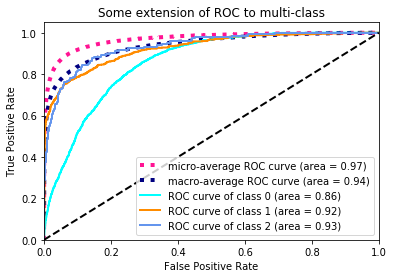

In [224]:
n_classes = len(tags_counts)
roc_auc(y_val, y_val_predicted_scores_mybag, n_classes)

# For : Tf-Idf

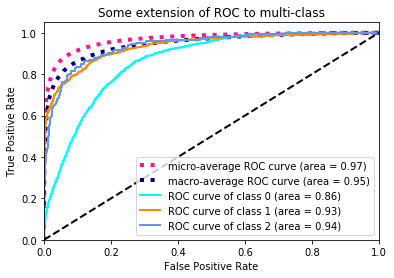

In [225]:
n_classes = len(tags_counts)
roc_auc(y_val, y_val_predicted_scores_tfidf, n_classes)